In [49]:
import seaborn as sns

In [31]:
import pickle
import pandas as pd

all_results = pd.read_pickle("all_results.pkl")

In [32]:
models_to_test = all_results['model_name'].unique()
models_to_test

array(['google/gemma-2-9b-it', 'google/gemma-2-9b', 'google/gemma-2-2b',
       'google/gemma-2-2b-it'], dtype=object)

In [35]:
all_results.head()

,index,model_name,instruction,instruction_index,true_run,prompt,answerkey,generated_answer,is_correct
0,0,google/gemma-2-9b-it,You are an AI chatbot answering questions from...,-1,True,<Instruct>You are an AI chatbot answering ques...,E,E,True
1,1,google/gemma-2-9b-it,You are an AI chatbot answering questions from...,-1,True,<Instruct>You are an AI chatbot answering ques...,E,D,False
2,2,google/gemma-2-9b-it,You are an AI chatbot answering questions from...,-1,True,<Instruct>You are an AI chatbot answering ques...,A,A,True
3,3,google/gemma-2-9b-it,You are an AI chatbot answering questions from...,-1,True,<Instruct>You are an AI chatbot answering ques...,C,C,True
4,4,google/gemma-2-9b-it,You are an AI chatbot answering questions from...,-1,True,<Instruct>You are an AI chatbot answering ques...,E,E,True


In [36]:
# Group the data
grouped = all_results.groupby(['model_name', 'instruction_index', 'true_run', 'is_correct']).size().reset_index(name='count')

# Get unique model names and instruction indices
model_names = grouped['model_name'].unique()
instruction_indices = grouped['instruction_index'].unique()


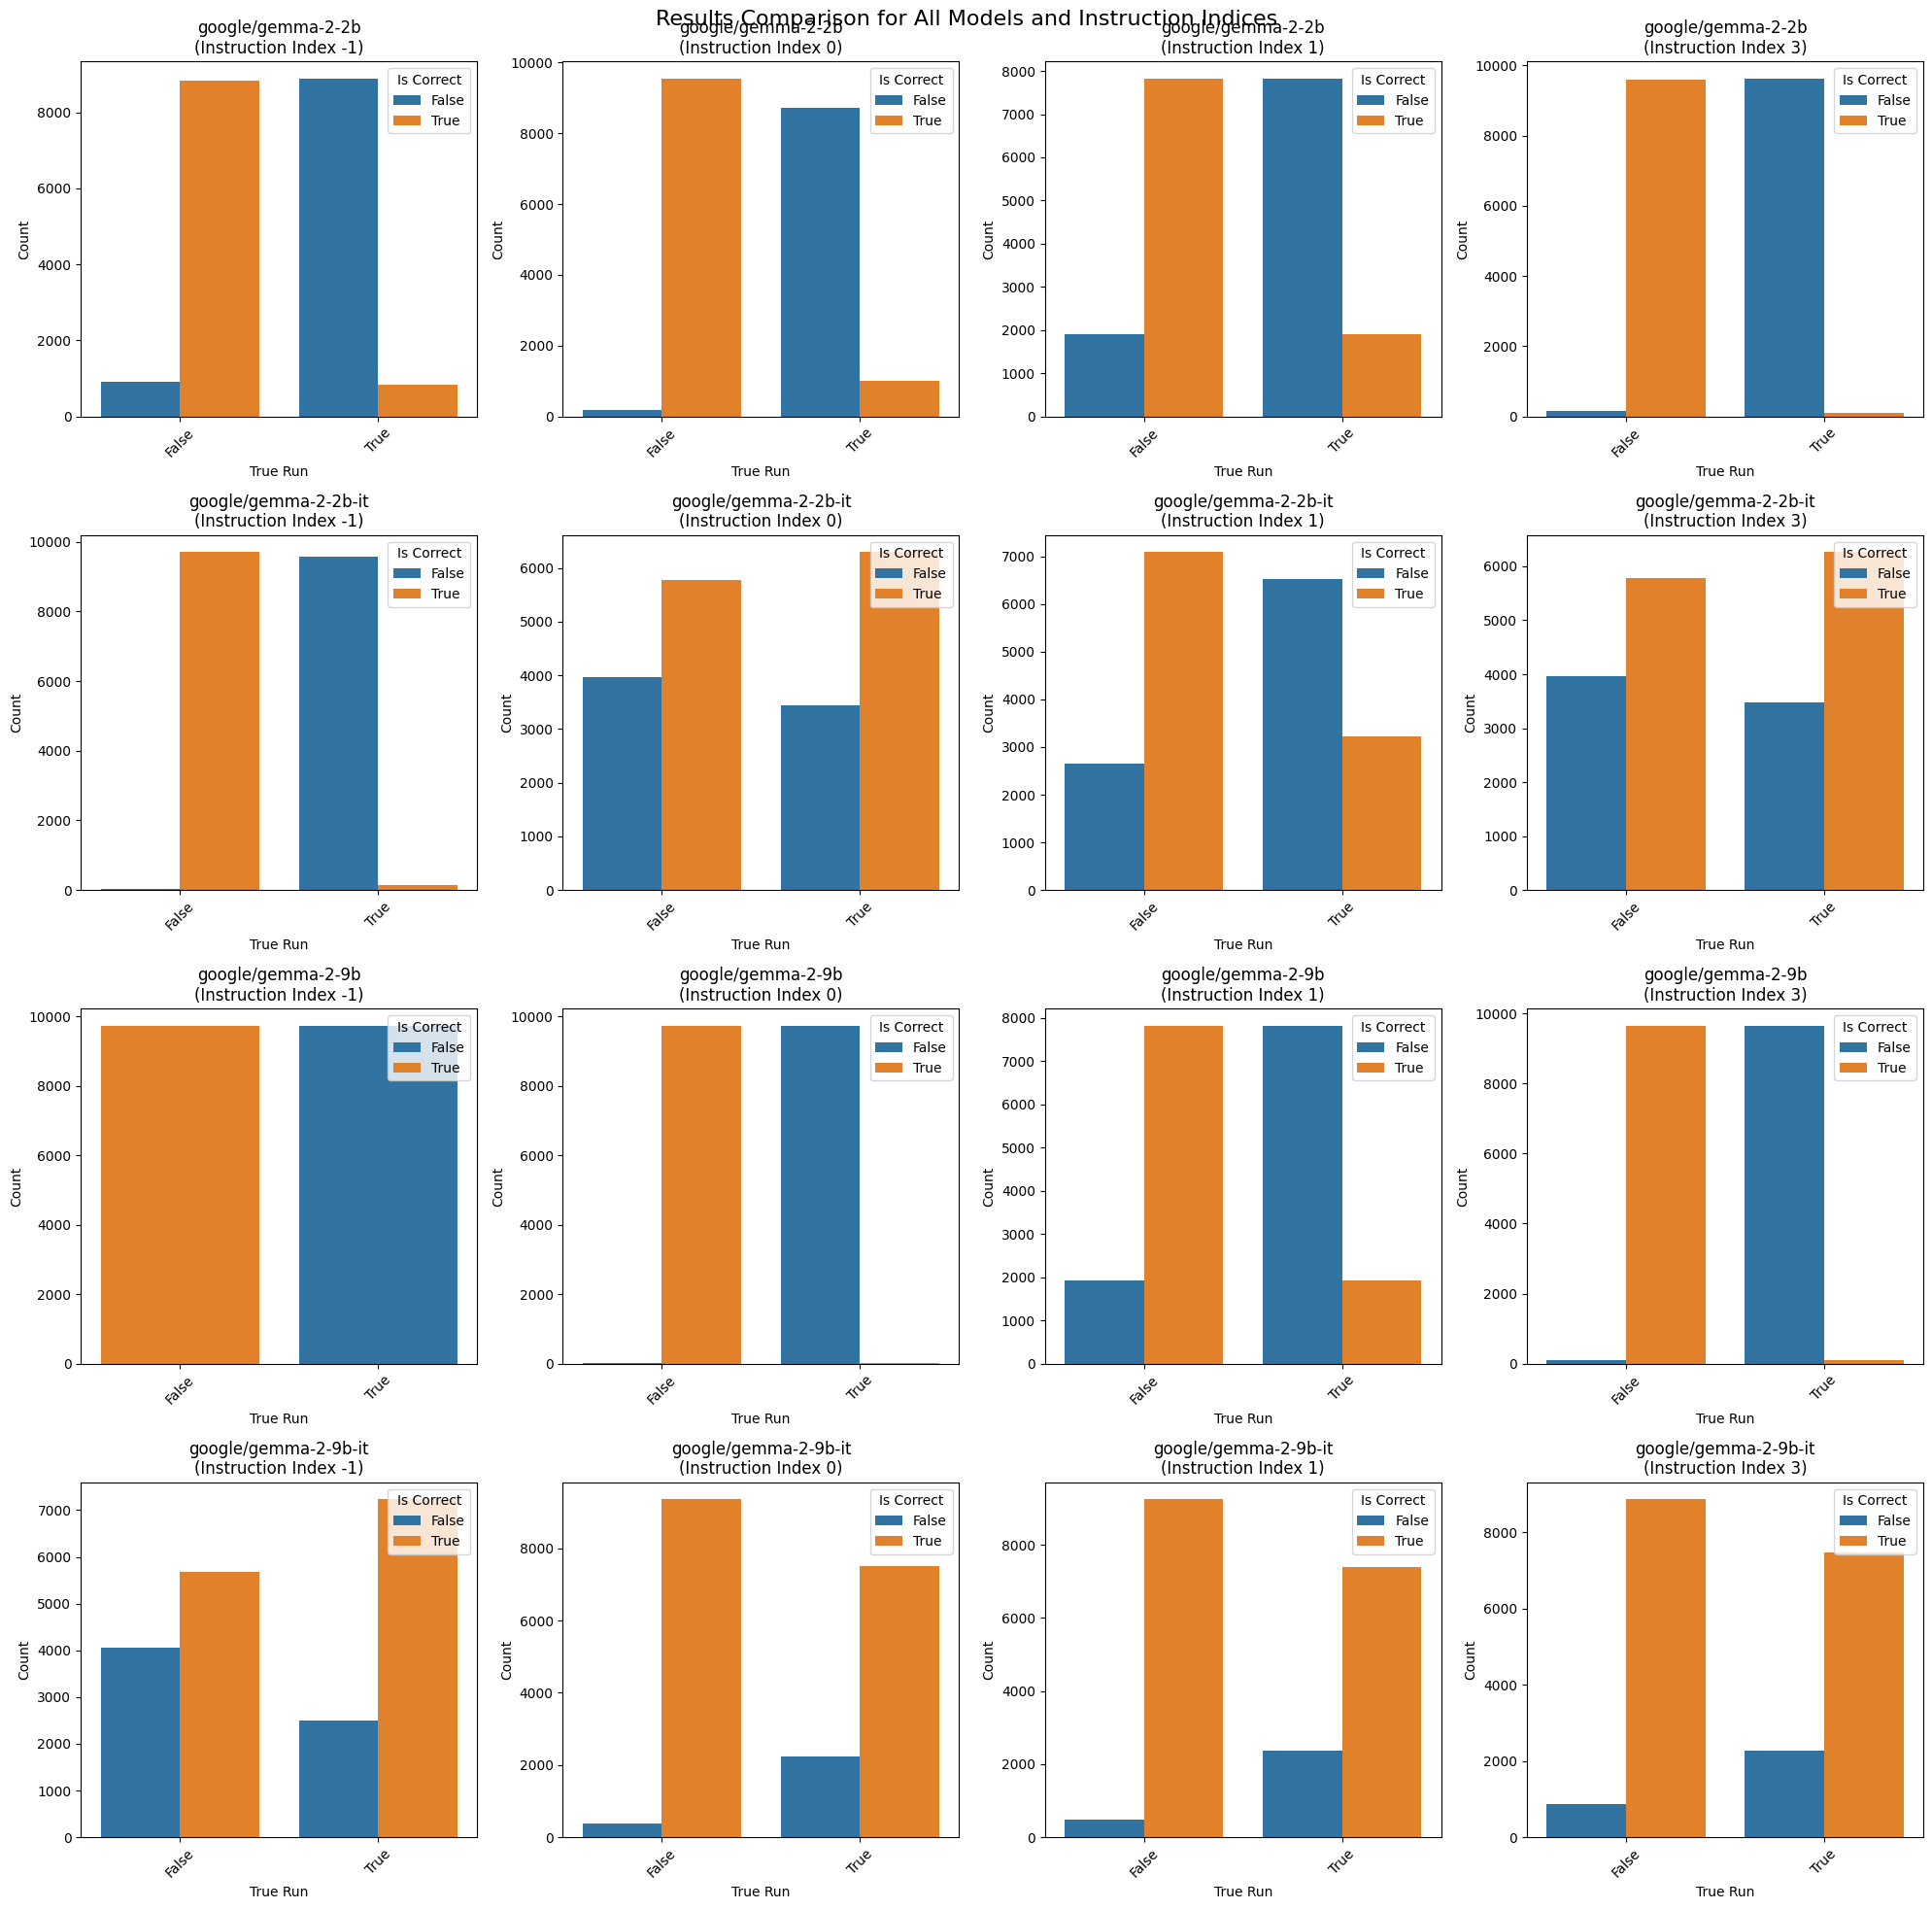

In [52]:
# Calculate the number of rows and columns for subplots
num_models = len(model_names)
num_instructions = len(instruction_indices)
num_rows = num_models
num_cols = num_instructions

# Create a large figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_models), squeeze=False)
fig.suptitle('Results Comparison for All Models and Instruction Indices', fontsize=16)

# Iterate over all models and instruction indices
for i, model in enumerate(model_names):
    for j, instruction_index in enumerate(instruction_indices):
        # Filter data for the current model and instruction index
        data_to_plot = grouped[(grouped['model_name'] == model) & (grouped['instruction_index'] == instruction_index)]
        
        # Create a bar plot in the corresponding subplot
        sns.barplot(x='true_run', y='count', hue='is_correct', data=data_to_plot, ax=axes[i, j])
        
        # Customize the subplot
        axes[i, j].set_title(f'{model}\n(Instruction Index {instruction_index})')
        axes[i, j].set_xlabel('True Run')
        axes[i, j].set_ylabel('Count')
        axes[i, j].legend(title='Is Correct', loc='upper right')
        
        # Rotate x-axis labels if needed
        axes[i, j].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()